#### 검색어: 파이썬 엔트로피 함수
https://blog.naver.com/PostView.nhn?blogId=roboholic84&logNo=221629115916

# Library

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# GPU

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:  # gpu가 있다면, 용량 한도를 5GB로 설정
    tf.config.experimental.set_virtual_device_configuration(gpus[0], 
                                                            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5*1024)])

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


# CPU

In [4]:
#GPU 사용 설정, -1이면 CPU 사용
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Entropy

In [10]:
def H(p):
    id_p = np.where(p != 0)
    return -np.sum(p[id_p] * np.log2(p[id_p]))

In [11]:
S = np.array([1,0])
s = np.array([0,1])
P = np.array([0.5, 0.5])

H(S) #치우쳐서 0
H(s)
H(P)

In [17]:
Method1 = pd.read_csv('Method1.csv')

In [20]:
Method1[['Method1']]

,Method1
0,0.059180
1,0.036668
2,0.032467
3,0.029130
4,0.027498
...,...
4063,-0.016966
4064,-0.017109
4065,-0.018246
4066,-0.019987


# Entropy에 쓸 비율 구하기

In [11]:
total_data = pd.read_csv('/project/LSH/total_data.csv')

In [12]:
x = np.load('/project/LSH/x_(7727,10,4068).npy')

In [13]:
x

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.

In [14]:
x_sum = x.sum(axis = 1)
x_sum.shape
x_sum

(7727, 4068)

array([[ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 8.,  0.,  0., ...,  0.,  0.,  0.],
       [ 7.,  0.,  2., ...,  0.,  0.,  0.],
       ...,
       [ 9.,  0.,  0., ...,  0.,  0.,  0.],
       [ 4.,  0.,  0., ...,  0.,  0.,  0.],
       [10.,  0.,  1., ...,  0.,  0.,  0.]])

In [15]:
x_item_only = x_sum.sum(axis = 0)
x_item_only.shape
x_item_only

(4068,)

array([5.3224e+04, 2.6900e+02, 8.1190e+03, ..., 5.0800e+02, 7.7000e+01,
       2.0000e+01])

In [16]:
sub_time = 7727*10
ratio1_lst = []
for i in x_item_only:
    ratio1 = i / sub_time
    ratio1_lst.append(ratio1)
ratio1_lst

[0.6888054872524912,
 0.003481299339976705,
 0.10507312022777275,
 7.764979940468486e-05,
 0.00908502653034813,
 0.0637763685777145,
 0.054768991846771066,
 0.02641387343082697,
 0.05373366118804193,
 9.059143263879901e-05,
 0.14240973210819205,
 0.12992105603727191,
 0.18593244467451792,
 0.020810146240455546,
 0.009214442862689272,
 0.0029118674776756827,
 0.00012941633234114146,
 0.0006211983952374789,
 0.0,
 0.07938397825805617,
 0.10049178206289634,
 0.08175229713989905,
 7.764979940468486e-05,
 0.00018118286527759803,
 0.002329493982140546,
 0.01598291704413097,
 0.05175359130322247,
 0.0,
 0.0,
 3.882489970234243e-05,
 1.2941633234114145e-05,
 1.2941633234114145e-05,
 0.094331564643458,
 0.00012941633234114146,
 0.22420085414779345,
 0.009434450627669212,
 0.05628316293516242,
 0.00446486346576938,
 0.00047884042966222335,
 0.0002847159311505112,
 0.0001941244985117122,
 0.3084120616021742,
 0.0,
 5.176653293645658e-05,
 0.0002588326646822829,
 1.2941633234114145e-05,
 0.0002717

In [17]:
ratio1_arr = np.array(ratio1_lst)
ratio0_arr = 1 - ratio1_arr

In [18]:
ratio0_arr

array([0.31119451, 0.9965187 , 0.89492688, ..., 0.99342565, 0.99900349,
       0.99974117])

# Entropy 함수에 적용

In [19]:
Entropy_lst = []
for i in range(len(ratio0_arr)):
    input_arr = np.array([ratio0_arr[i], ratio1_arr[i]])
#     input_arr
#     break
    en = H(input_arr)
    Entropy_lst.append(en)
# Entropy_lst

In [20]:
Entropy_arr = np.array(Entropy_lst)

# Entropy 붙이기 전의 allfit으로 구한 Method1 불러와서 Entropt_lst 곱해주고 Method1_Entropy로 새로 저장하면 됨.

## Method1_allfit (이거 아님)

In [50]:
Method1 = pd.read_csv('Method1_allfit.csv')

In [61]:
Method1 = Method1.sort_values('feature').reset_index()
Method1.drop('index', axis = 1, inplace = True)
# 곱하기 전에 feature로 정렬해야함. x는 feature로 정렬되어있기 때문

In [71]:
Method1_X_Entropy = Method1['Method1'] * Entropy_arr

In [74]:
Method1_entropy = pd.concat([Method1['feature'], Method1_X_Entropy], axis = 1)

In [85]:
Method1_entropy.sort_values(by = 'Method1', ascending = False, inplace = True)

In [86]:
# Method1_entropy.to_csv('Method1_Entropy_allfit.csv', index = False)

## allfit 전 Method1.csv로 해야함.

In [21]:
Method1 = pd.read_csv('Method1.csv')

In [22]:
Method1 = Method1.sort_values('feature').reset_index()
Method1.drop('index', axis = 1, inplace = True)
# 곱하기 전에 feature로 정렬해야함. x는 feature로 정렬되어있기 때문

In [23]:
Method1_X_Entropy = Method1['Method1'] * Entropy_arr

In [24]:
Method1_entropy = pd.concat([Method1['feature'], Method1_X_Entropy], axis = 1)

In [25]:
Method1_entropy.sort_values(by = 'Method1', ascending = False, inplace = True)

In [26]:
Method1_entropy

,feature,Method1
2148,409176230,0.005401
119,51003,0.004728
2291,487980125,0.004619
20,50862,0.003684
8,50813,0.003597
...,...,...
1034,56017275,-0.002138
383,227194,-0.002156
307,224277,-0.002187
19,50861,-0.003311


In [27]:
# Method1_entropy.to_csv('Method1_Entropy.csv', index = False)

# Method_Entropy load

In [28]:
Method1 = pd.read_csv('Method1_Entropy.csv')

In [29]:
Method1

,feature,Method1
0,409176230,0.005401
1,51003,0.004728
2,487980125,0.004619
3,50862,0.003684
4,50813,0.003597
...,...,...
4063,56017275,-0.002138
4064,227194,-0.002156
4065,224277,-0.002187
4066,50861,-0.003311


In [7]:
Method_LSH = pd.read_csv('/project/LSH/m1_entropy.csv')

In [8]:
Method_LSH

,feature,diff,mul,entropy,final_mul
0,409176230,0.014189,0.014189,0.380630,0.005401
1,51003,0.014328,0.014328,0.329998,0.004728
2,487980125,0.007584,0.007584,0.609046,0.004619
3,50862,0.007828,0.007828,0.470553,0.003684
4,50813,0.011908,0.011908,0.302050,0.003597
...,...,...,...,...,...
4063,56017275,0.011329,-0.011329,0.188707,-0.002138
4064,227194,0.025418,-0.025418,0.084824,-0.002156
4065,224277,0.006929,-0.006929,0.315556,-0.002187
4066,50861,0.008277,-0.008277,0.400005,-0.003311


# graph
## graph library
## absum 함수

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#한글설정
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)
    
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
# "axes.unicode_minus" : 마이너스가 깨질 것을 방지

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [30]:
total_data = pd.read_csv('/project/LSH/total_data_7727.csv')
x = np.load('/project/LSH/x_(7727,10,4068).npy')

def absum(PPL_list,top_or_down):
    # 1) PRE_top10의 index 구하기
    PPL_top10 = top_or_down
    item_list = total_data['ITEMID'].sort_values().unique()

    PPL_index = []
    for i in PPL_top10:
        a = list(item_list).index(i)
        PPL_index.append(a)
    
    # 2) 생존자 index 구하기 
    sub7727 = total_data['SUBJECT_ID'].unique()

    patient = pd.read_csv('/project/LSH/폐렴환자.csv')
    patient = patient.sort_values(by='SUBJECT_ID')
    patient = patient[patient['SUBJECT_ID'].isin(sub7727)]
    sub_1_list = patient[patient['EXPIRE_FLAG']==0]['SUBJECT_ID'].values

    생존자_index = []
    for i in sub_1_list:
        생존자_index.append(list(sub7727).index(i))
        
    # 3) 생존자 3009명의 D-10 ~ D-1 feature별 abnormal sum 
    x_생존자 = x[생존자_index,:,:]

    result1 = []
    for i in PPL_index:
        for j in range(10):
            result1.append(x_생존자[:,j,i].sum())

    result1 = np.array(result1)
    result1 = result1.reshape(10,-1)
    df_PPL = pd.DataFrame(result1)
    df_PPL.columns = [f'D-{i}' for i in range(10,0,-1)]
    df_PPL.index = PPL_top10

    # 생존한 3009명에 대한 비율 계산
    for i in PPL_top10:
        df_PPL.loc[f'{i}_생존'] = df_PPL.loc[i].iloc[:]/x_생존자.shape[0]
        
    # 4) 사망자 4718명의 D-10 ~ D-1 feature별 abnormal sum 
    사망자_index = list(set(range(0,7727))-set(생존자_index))

    x_사망자 = x[사망자_index,:,:]

    result2 = []
    for i in PPL_index:
        for j in range(10):
            result2.append(x_사망자[:,j,i].sum())

    result2 = np.array(result2)
    result2 = result2.reshape(10,-1)
    df_PPL_사망자 = pd.DataFrame(result2)
    df_PPL_사망자.columns = [f'D-{i}' for i in range(10,0,-1)]
    df_PPL_사망자.index = PPL_top10

    # 사망한 4718명에 대한 비율 계산
    for i in PPL_top10:
        df_PPL_사망자.loc[f'{i}_사망'] = df_PPL_사망자.loc[i]/x_사망자.shape[0] 
        
    # 5) for문으로 각 feature에 대한 비율 추이 그래프 그리기 

    df_PPL_trans = df_PPL.transpose()
    df_PPL_사망자_trans = df_PPL_사망자.transpose()

    _ = plt.figure(figsize = (13,12),dpi=150)
    for i, f in enumerate(PPL_top10): 
        _ = plt.subplot(4,3,1+i)
        _ = plt.title(f)
        _ = ax = sns.lineplot(data = df_PPL_사망자_trans, x = df_PPL_사망자_trans.index, y = f'{f}_사망')
        _ = ax = sns.lineplot(data = df_PPL_trans, x = df_PPL_trans.index, y = f'{f}_생존')
        _ = ax.legend(labels = ['사망', '생존'], loc = 'upper left', fontsize=12)
        _ = ax.set_ylabel('per', fontsize = 12)

    plt.tight_layout()

In [37]:
method1 = pd.read_csv('Method1_Entropy.csv')
method1 = method1.sort_values(by='Method1',ascending=False)
m1_feature = method1['feature'].tolist()

# LAB, PRE, PRO의 item_list 생성 
LAB_item = total_data[total_data['TYPE']=='LAB']['ITEMID'].unique()
PRE_item = total_data[total_data['TYPE']=='PRE']['ITEMID'].unique()
PRO_item = total_data[total_data['TYPE']=='PRO']['ITEMID'].unique()

LAB_list = []
PRE_list = []
PRO_list = []
for i in m1_feature:
    if i in LAB_item:
        LAB_list.append(i)
    elif i in PRE_item:
        PRE_list.append(i)
    else:
        PRO_list.append(i)

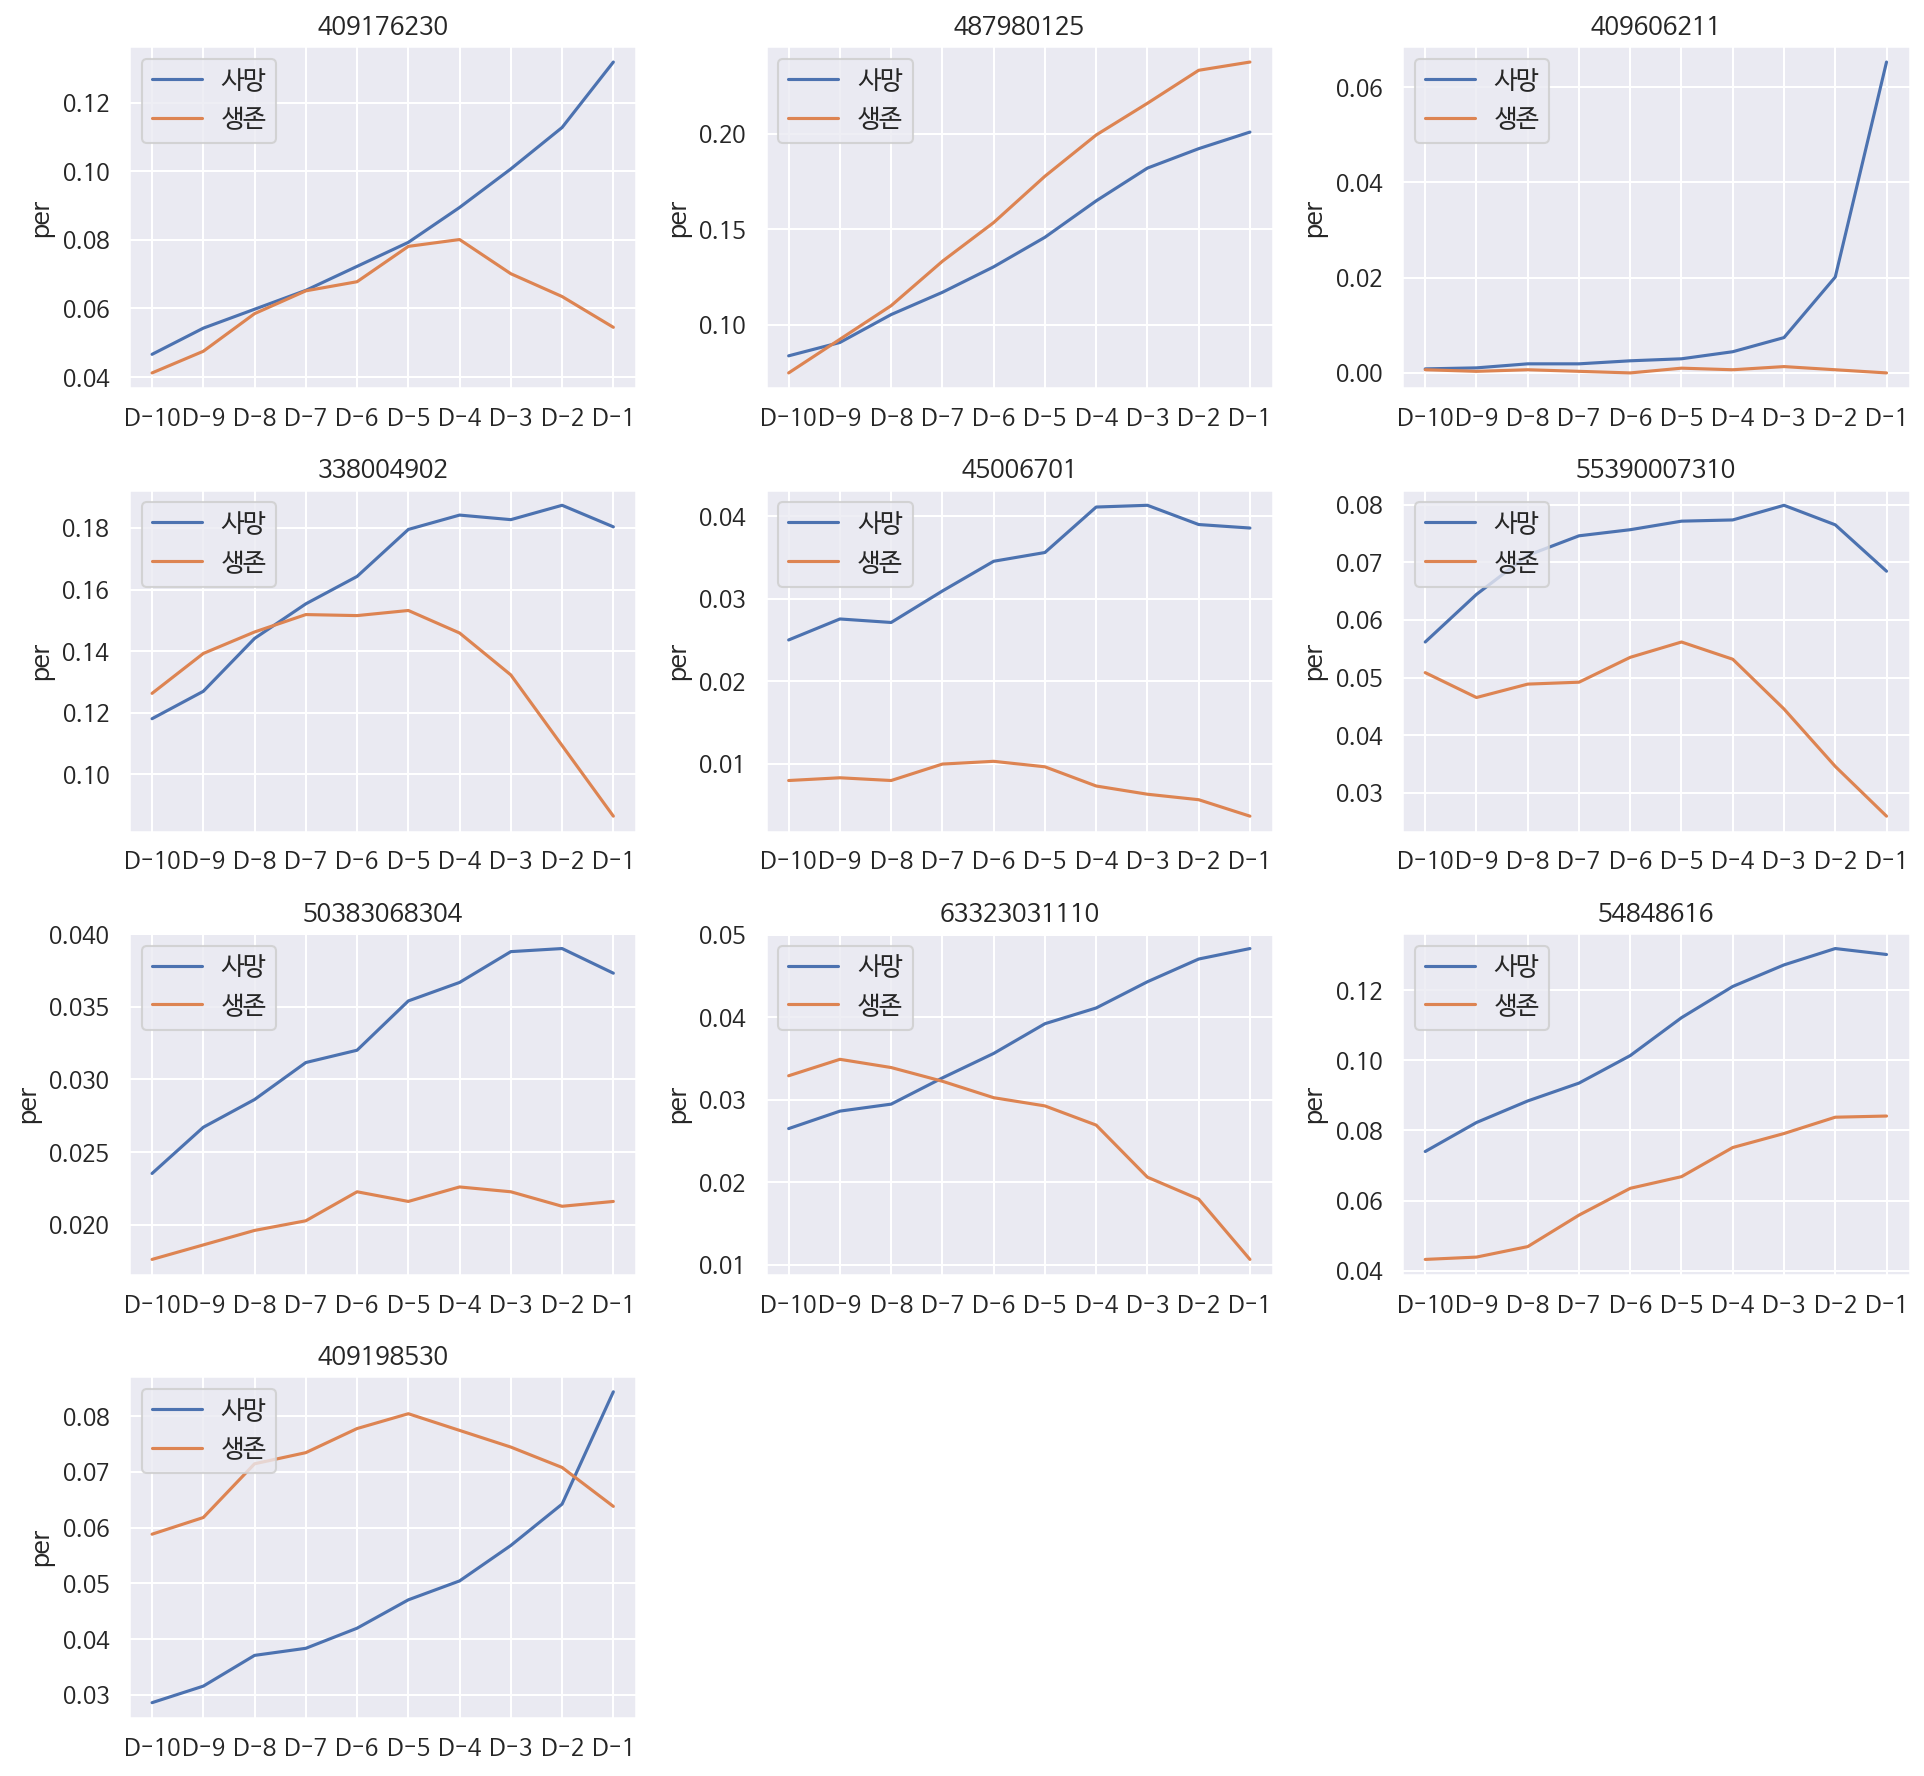

In [38]:
absum(PRE_list,PRE_list[:10])

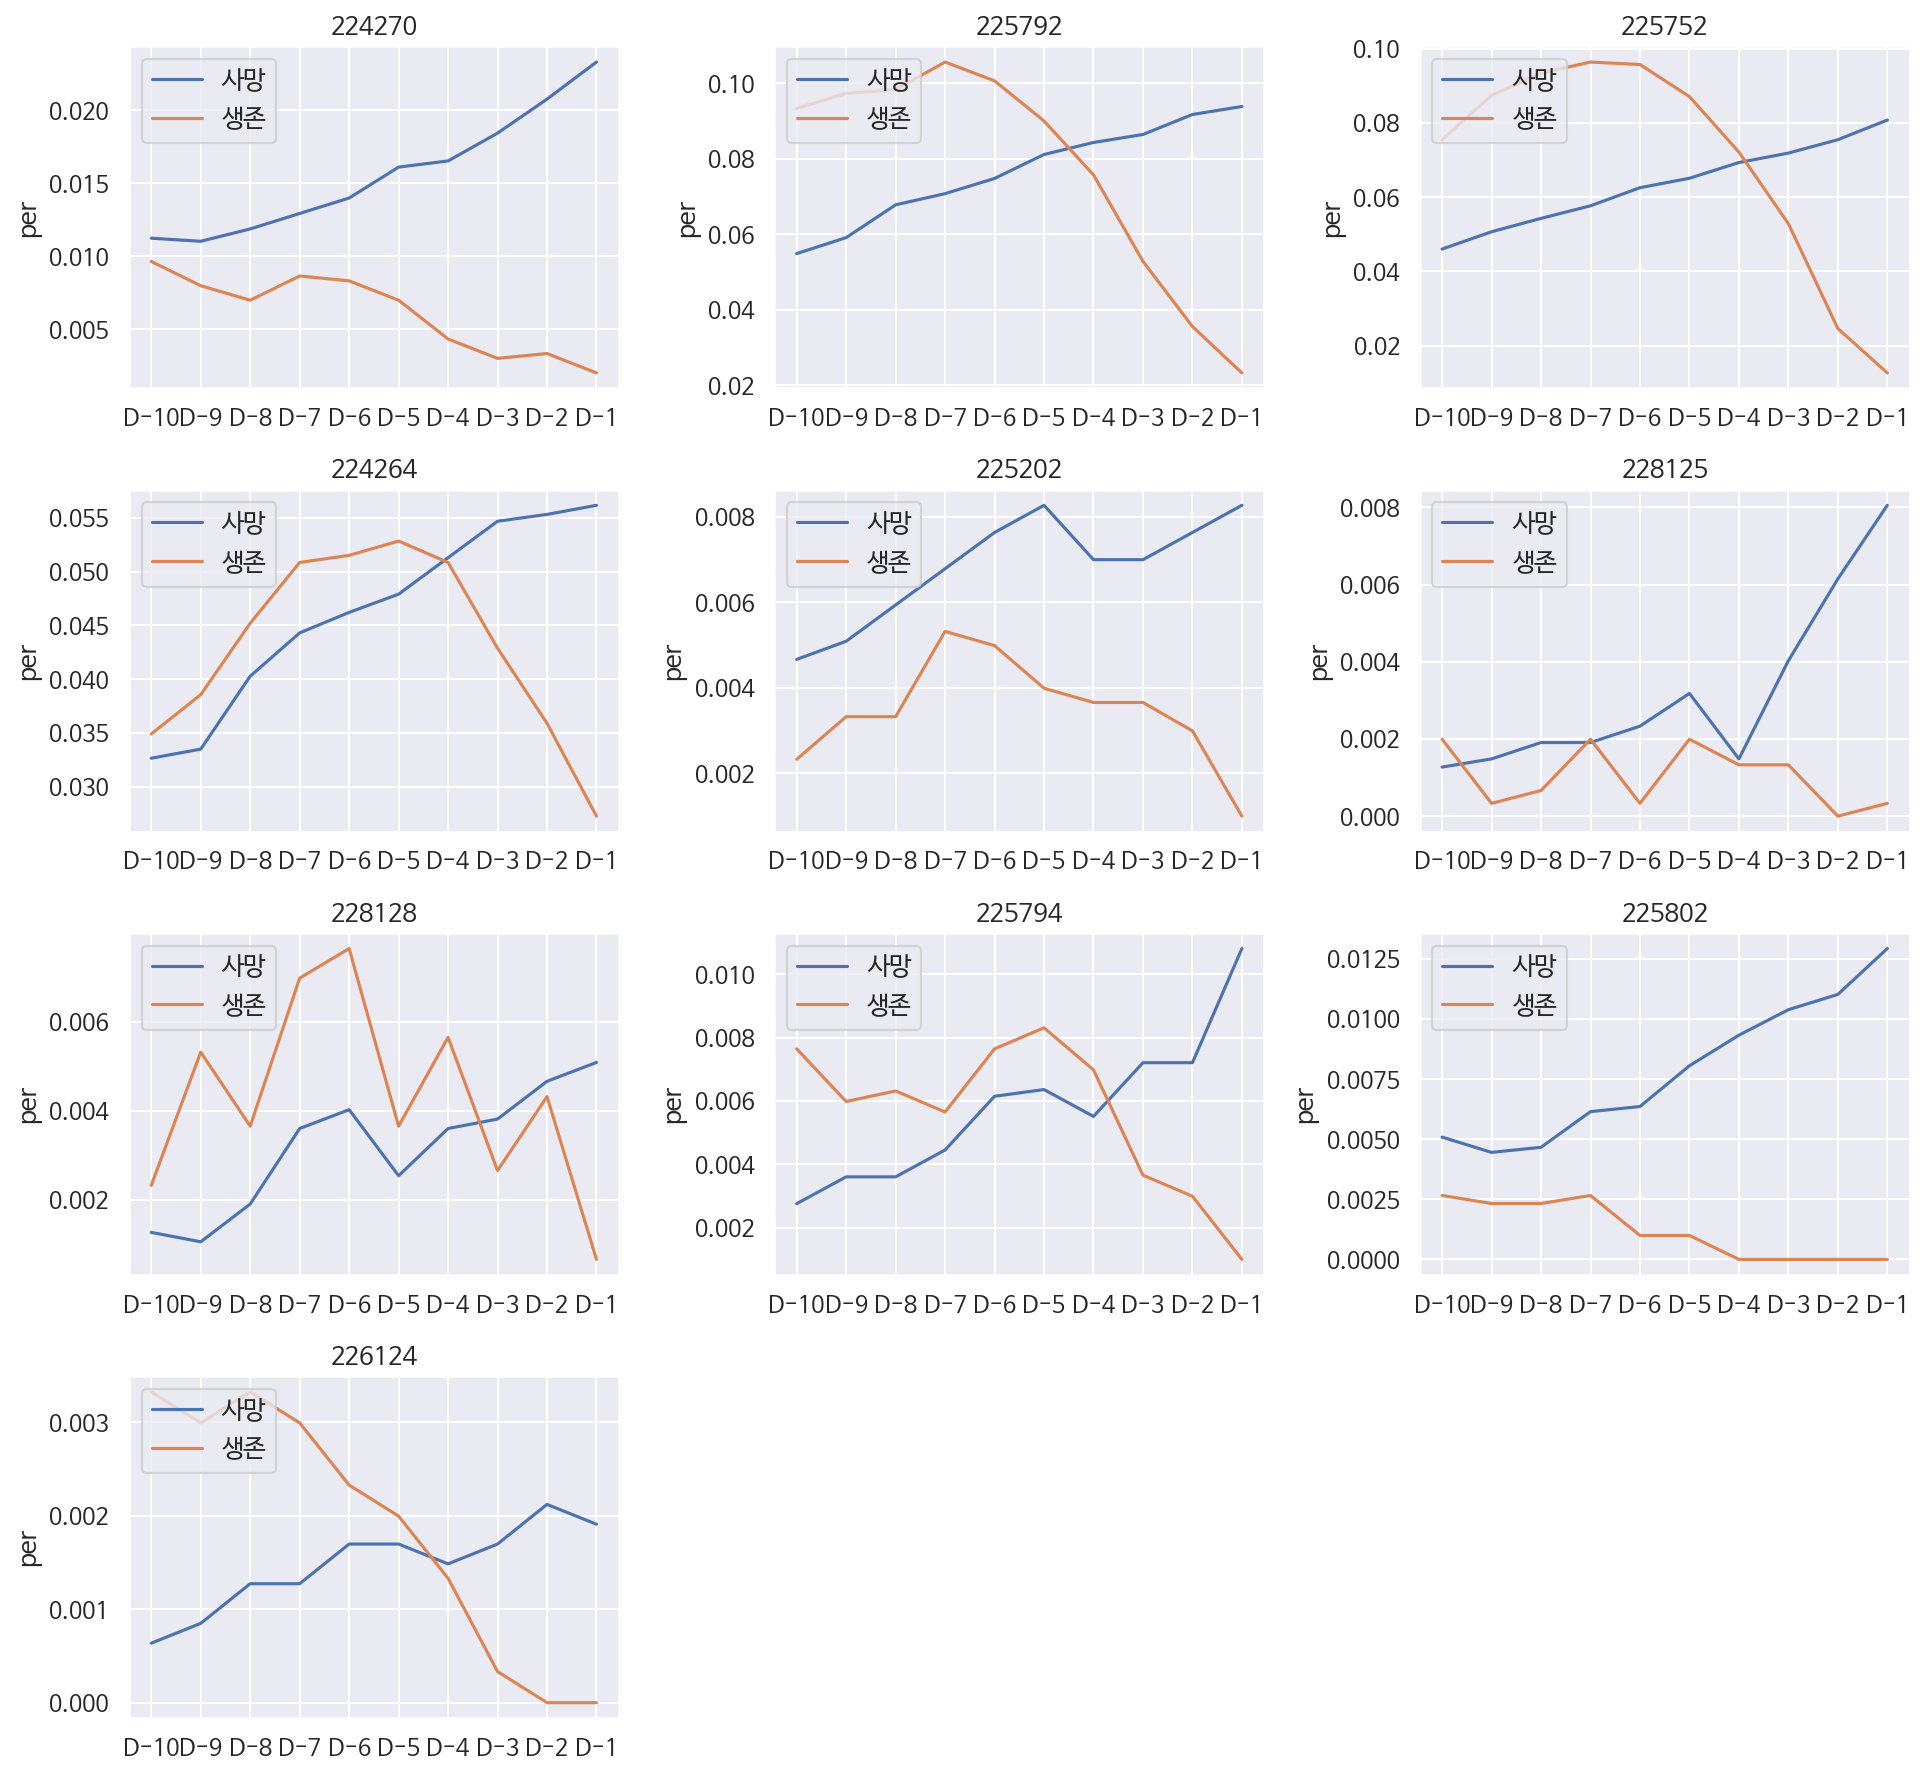

In [39]:
absum(PRO_list,PRO_list[:10])

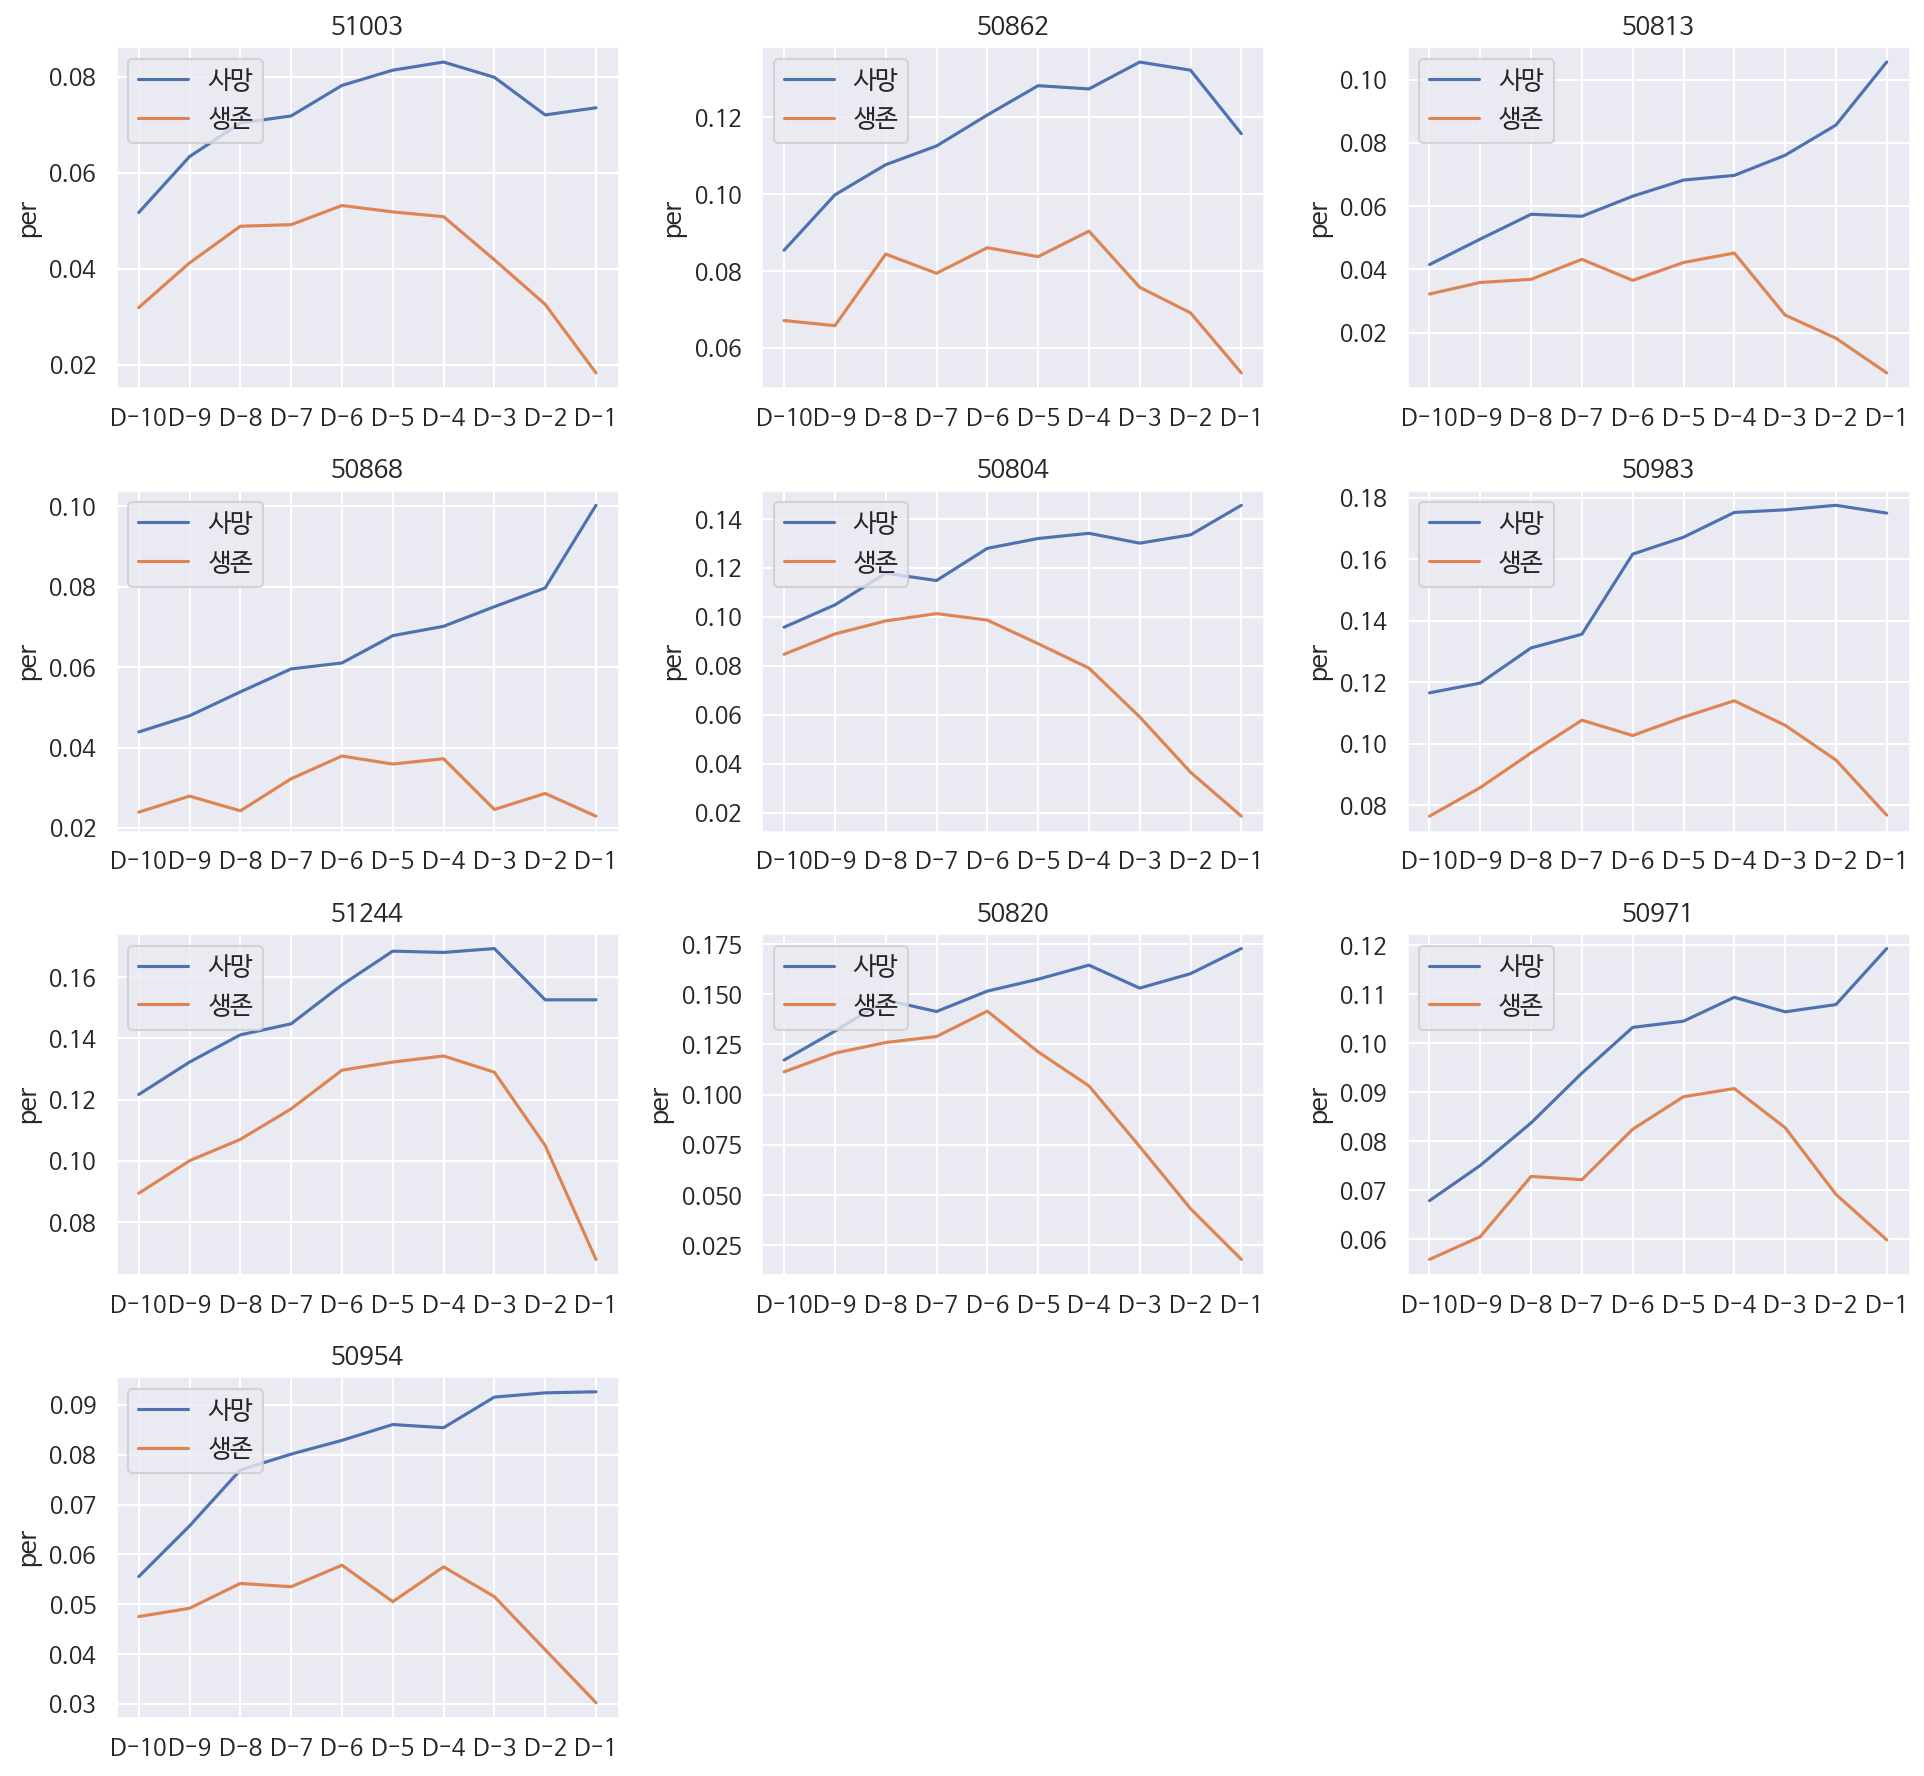

In [40]:
absum(LAB_list,LAB_list[:10])